In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import KFold

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

In [104]:
import seaborn as ans

In [44]:
from sklearn.model_selection import cross_val_score

In [2]:
pd.set_option('display.max_columns',None)


In [3]:
filename = '/content/drive/MyDrive/IIT Kanpur/Internship Algo 8/bank-additional/bank-additional/bank-additional-full.csv'

In [4]:
df = pd.read_csv(filename,sep=';')

In [5]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#Data Preparation

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In this dataset there is no missing values, so we can move to the next steps that is converting categorical values into numerical values

In [7]:
categorical_columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']

In [8]:
label_encoder = LabelEncoder()

In [9]:
for i in categorical_columns:
  print('job column elements', sorted(set(df[i])))
  df[i] = label_encoder.fit_transform(df[i])
  print(sorted(df[i].unique()))

job column elements ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
job column elements ['divorced', 'married', 'single', 'unknown']
[0, 1, 2, 3]
job column elements ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']
[0, 1, 2, 3, 4, 5, 6, 7]
job column elements ['no', 'unknown', 'yes']
[0, 1, 2]
job column elements ['no', 'unknown', 'yes']
[0, 1, 2]
job column elements ['no', 'unknown', 'yes']
[0, 1, 2]
job column elements ['cellular', 'telephone']
[0, 1]
job column elements ['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
job column elements ['fri', 'mon', 'thu', 'tue', 'wed']
[0, 1, 2, 3, 4]
job column elements ['failure', 'nonexistent', 'success']
[0, 1, 2]
job column elements ['no', 'yes']
[0, 1]


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Now all the columns are in form of int or float so now we can use it for our further operations


In [11]:
df.age.unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

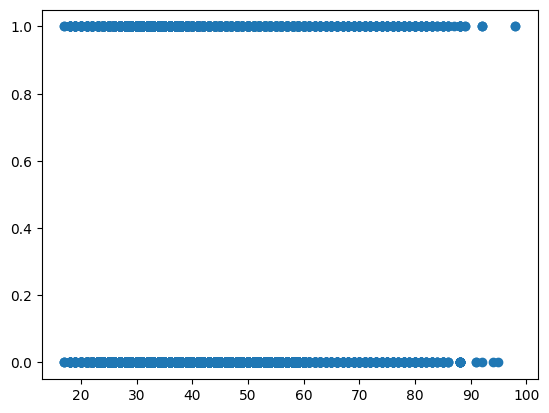

In [12]:
plt.scatter(df.age, df.y)

Based on age we can't make any conclusion that a specific age group of people takes term deposit or do not take.

<Axes: xlabel='job', ylabel='count'>

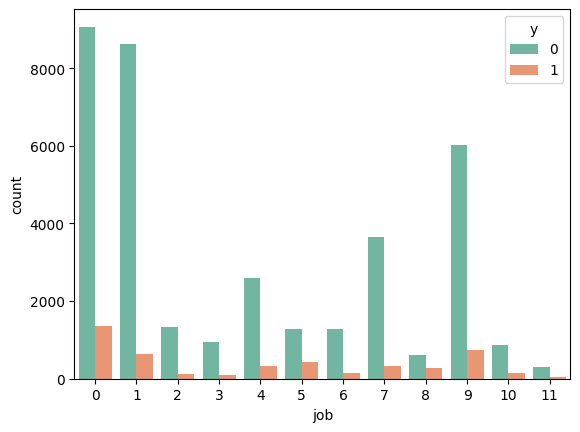

In [13]:
sns.countplot(x=df.job, hue=df.y, data=df, palette='Set2')

<Axes: xlabel='education', ylabel='count'>

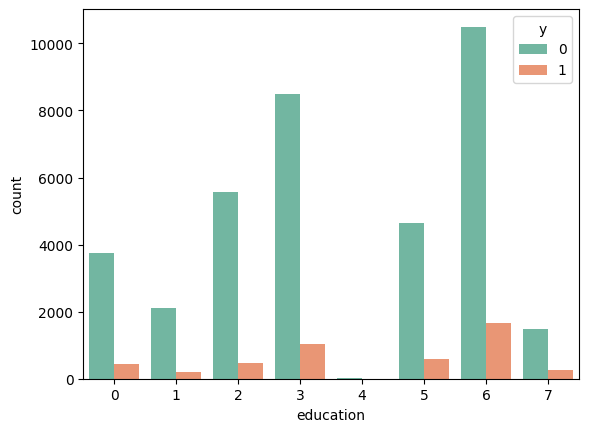

In [14]:
sns.countplot(x=df.education, hue=df.y, data=df, palette='Set2')

In [15]:
age_groups = {
    '18-24': (18, 24),
    '25-34': (25, 34),
    '35-44': (35, 44),
    '45-54': (45, 54),
    '55-64': (55, 64),
    '65-74': (65, 74),
    '75-84': (75, 84),
    '85+': (85, 120),
}


In [16]:
def categorize_age(age):
    for group, (lower, upper) in age_groups.items():
        if lower <= age <= upper:
            return group
    return 'Unknown'  # Handle cases where age doesn't fall into any group

# Create a new column 'Age_Group' based on custom age groups
df['age_Group'] = df['age'].apply(categorize_age)


In [17]:
df.drop(columns=['age'], inplace=True)

In [18]:
df

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_Group
0,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,55-64
1,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,55-64
2,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,35-44
3,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,35-44
4,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,55-64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,65-74
41184,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,45-54
41185,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,55-64
41186,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,35-44


In [19]:
print('Job column elements', sorted(set(df['age_Group'])))
df['age_Group'] = label_encoder.fit_transform(df['age_Group'])
print(sorted(df['age_Group'].unique()))

Job column elements ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+', 'Unknown']
[0, 1, 2, 3, 4, 5, 6, 7, 8]


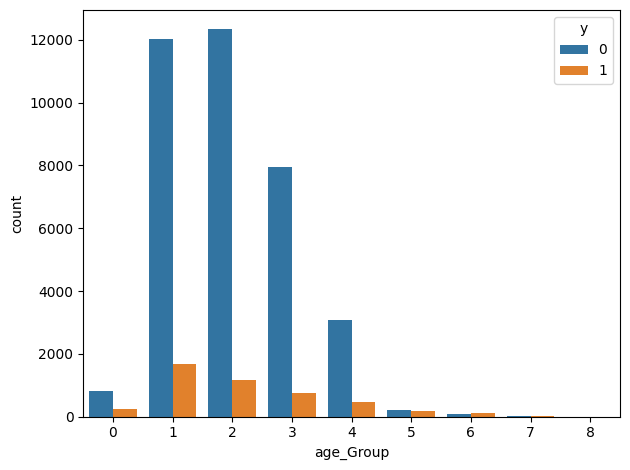

In [20]:
sns.countplot(x=df.age_Group, hue=df.y, data=df)
plt.tight_layout()
plt.show()

With the increase in the age of the customer there is increase in chances of getting subscription, AGE_GROUP of 75-84 has the most chances of taking subscription

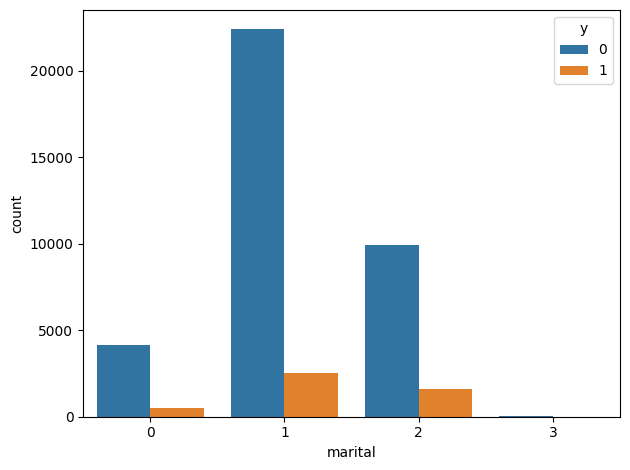

In [21]:
sns.countplot(x=df.marital, hue=df.y, data=df)
plt.tight_layout()
plt.show()

From the above graph we can visualize that Single people are taking more subscriptions than the other

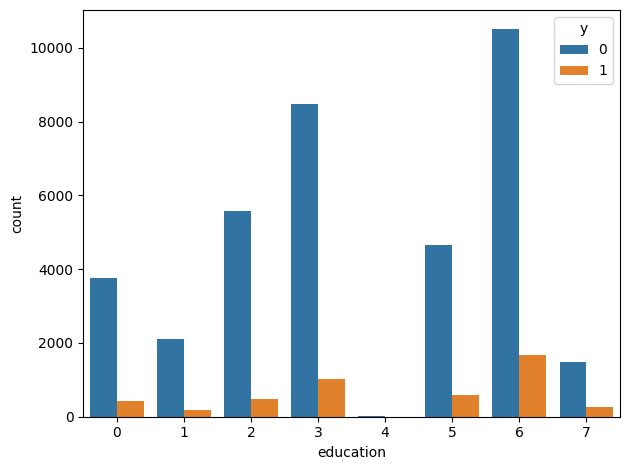

In [22]:
sns.countplot(x=df.education, hue=df.y, data=df)
plt.tight_layout()
plt.show()

By having a look on chart we can't make any specific conclusion that how this column is affecting the y

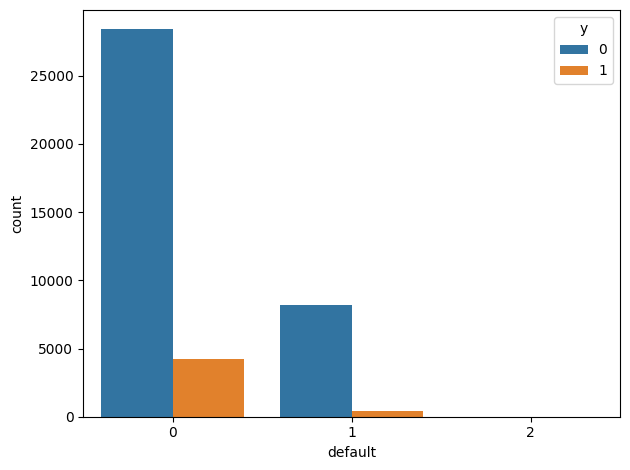

In [23]:
sns.countplot(x=df.default, hue=df.y, data=df)
plt.tight_layout()
plt.show()

Didn't get any thing spcefic from default column



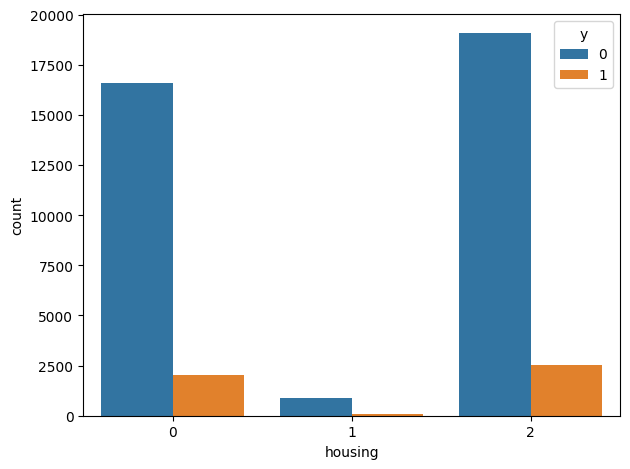

In [24]:
sns.countplot(x=df.housing, hue=df.y, data=df)
plt.tight_layout()
plt.show()

From this one we can say that the one who has housing loan also take subscription


But on other side we do not get anything specific

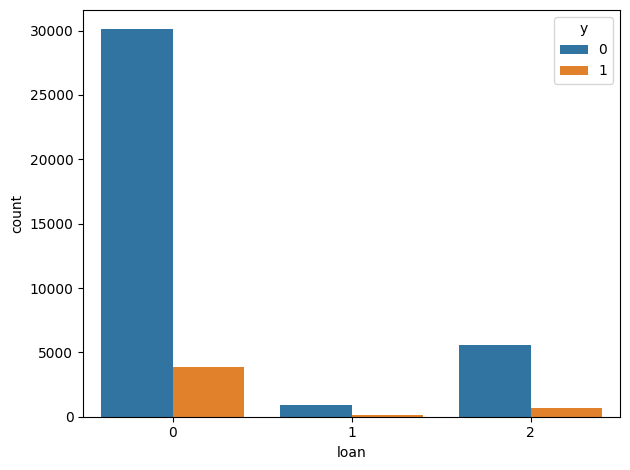

In [25]:
sns.countplot(x=df.loan, hue=df.y, data=df)
plt.tight_layout()
plt.show()

From this one we can say that the one who has personal loan also take subscription


But on other side we do not get anything specific

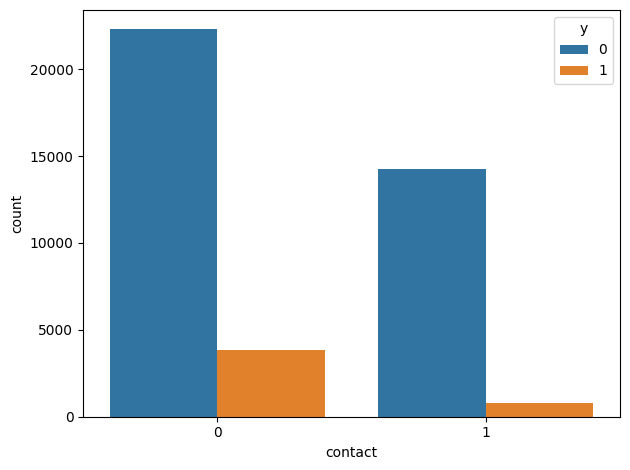

In [26]:
sns.countplot(x=df.contact, hue=df.y, data=df)
plt.tight_layout()
plt.show()

people with celular phone buys substription most  of the times

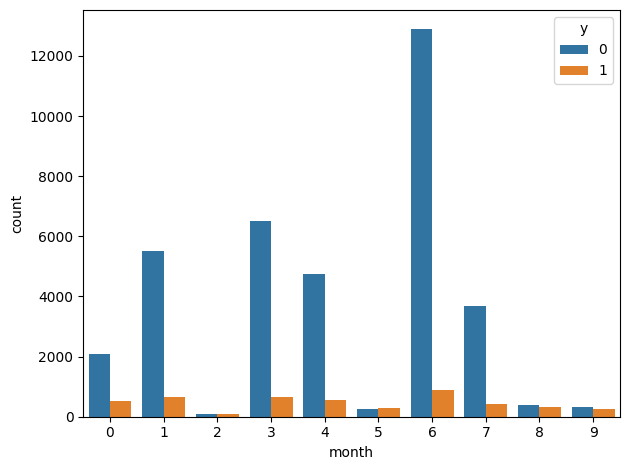

In [27]:
sns.countplot(x=df.month, hue=df.y, data=df)
plt.tight_layout()
plt.show()

From the above chart we can see that the customers which have been contacted between the month of april to august has low chances of buying term deposit subscription

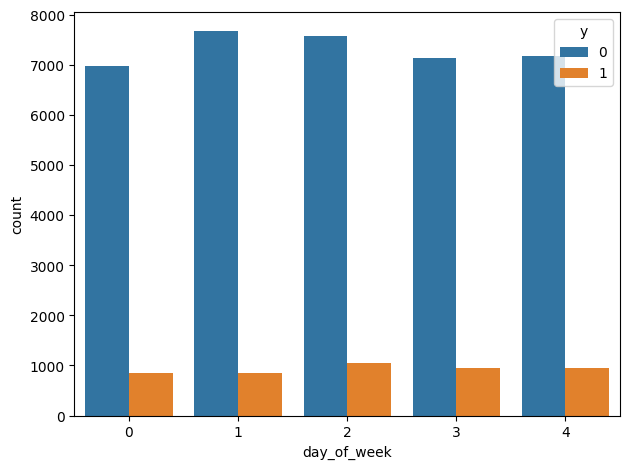

In [28]:
sns.countplot(x=df.day_of_week, hue=df.y, data=df)
plt.tight_layout()
plt.show()

We do not get any specific pattern in buying the subscription with respect to the day of week

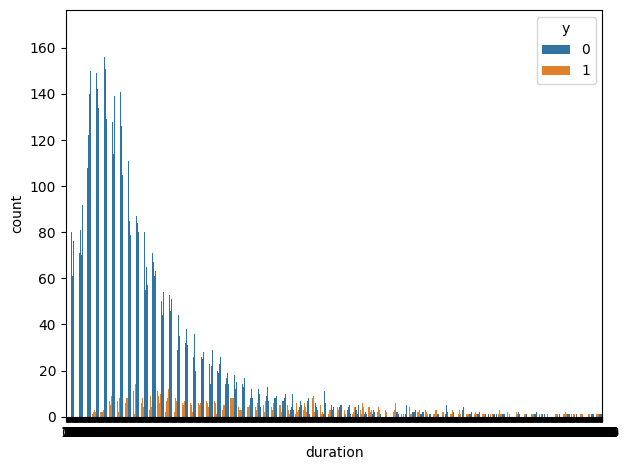

In [29]:
sns.countplot(x=df.duration, hue=df.y, data=df)
plt.tight_layout()
plt.show()

In the above graph we can see that the customers who has longer duration time has lower chances of buying subscription and those who had lower duration time has greater chances of buying the subscription

In [30]:
df.describe(include='all')

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_Group
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,3.72458,1.172769,3.747184,0.208872,1.071720,0.327425,0.365252,4.230868,2.004613,258.285010,2.567593,962.475454,0.172963,0.930101,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654,2.057590
std,3.59456,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,2.320025,1.397575,259.279249,2.770014,186.910907,0.494901,0.362886,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173,1.094347
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,102.000000,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,1.000000
50%,2.00000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,180.000000,2.000000,999.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,2.000000
75%,7.00000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,319.000000,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,3.000000
max,11.00000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,4918.000000,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,8.000000


In [31]:
df.pdays = df.pdays.replace(to_replace=30, value=-1)

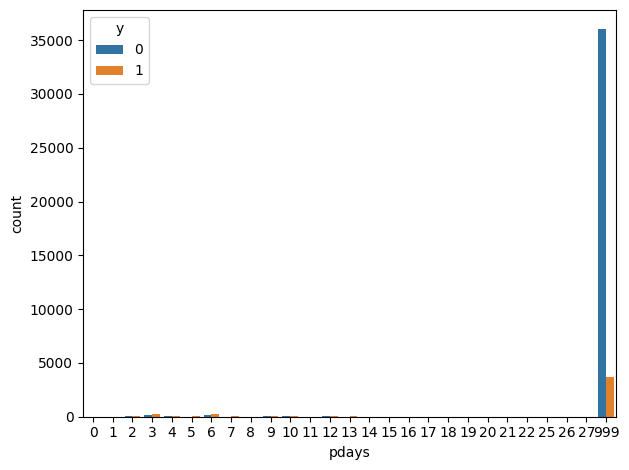

In [32]:
sns.countplot(x=df.pdays, hue=df.y, data=df)
plt.tight_layout()
plt.show()

According to me, This contact is not really useful because from the duration column we get some insights about it.

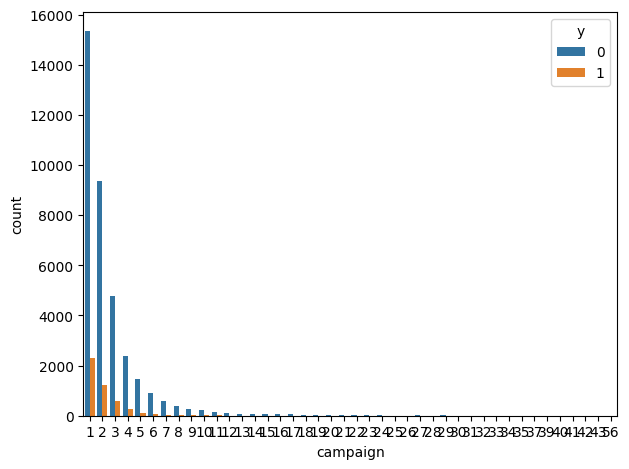

In [33]:
sns.countplot(x=df.campaign, hue=df.y, data=df)
plt.tight_layout()
plt.show()

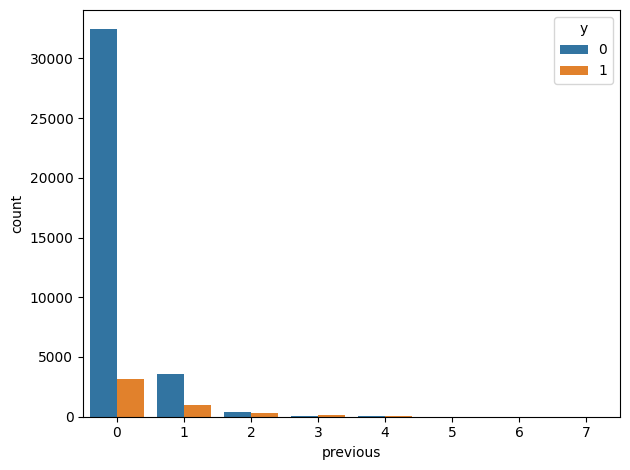

In [34]:
sns.countplot(x=df.previous, hue=df.y, data=df)
plt.tight_layout()
plt.show()

<Axes: >

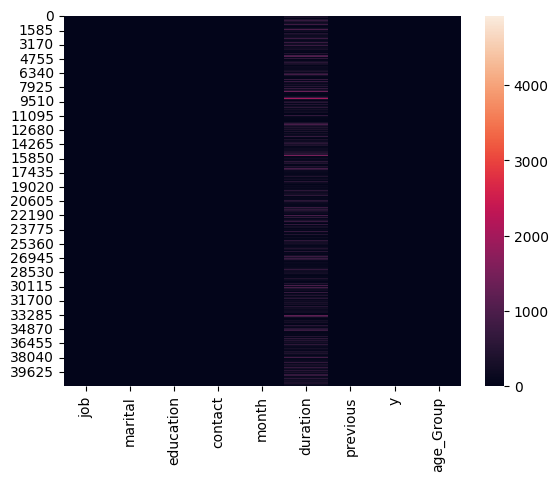

In [105]:
sns.heatmap(df)

We can see that with the increase in the previously contacted times there is a clear change in the number of customer buying the subscription

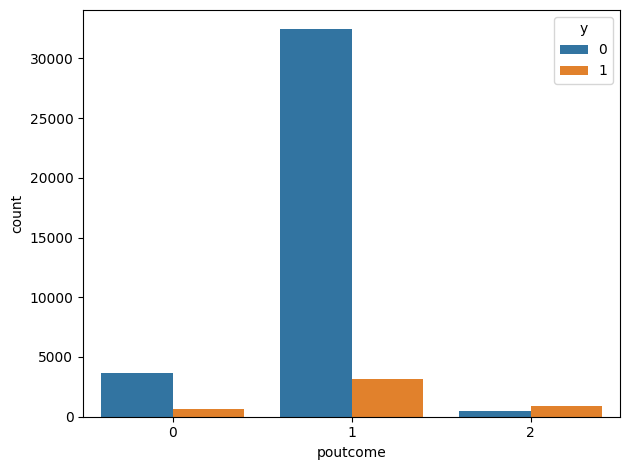

In [36]:
sns.countplot(x=df. poutcome, hue=df.y, data=df)
plt.tight_layout()
plt.show()

I don't think this info is creating any good impact on buying the subscription

In [37]:
# There are some columns which are  not quite useful for us, so we will not use those for our training purpose

del_columns = ['pdays','poutcome',	'emp.var.rate',	'cons.price.idx',	'cons.conf.idx',	'euribor3m',	'nr.employed']

for i in del_columns:
  df.drop(columns=[i], inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   job          41188 non-null  int64
 1   marital      41188 non-null  int64
 2   education    41188 non-null  int64
 3   default      41188 non-null  int64
 4   housing      41188 non-null  int64
 5   loan         41188 non-null  int64
 6   contact      41188 non-null  int64
 7   month        41188 non-null  int64
 8   day_of_week  41188 non-null  int64
 9   duration     41188 non-null  int64
 10  campaign     41188 non-null  int64
 11  previous     41188 non-null  int64
 12  y            41188 non-null  int64
 13  age_Group    41188 non-null  int64
dtypes: int64(14)
memory usage: 4.4 MB


In [39]:
Y = df['y'].values
X = df.drop('y', axis=1).values

In [40]:
X

array([[3, 1, 0, ..., 1, 0, 4],
       [7, 1, 3, ..., 1, 0, 4],
       [7, 1, 3, ..., 1, 0, 2],
       ...,
       [5, 1, 6, ..., 2, 0, 4],
       [9, 1, 5, ..., 1, 0, 2],
       [5, 1, 5, ..., 3, 1, 5]])

In [41]:
Y

array([0, 0, 0, ..., 0, 1, 0])

In [42]:
df

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,y,age_Group
0,3,1,0,0,0,0,1,6,1,261,1,0,0,4
1,7,1,3,1,0,0,1,6,1,149,1,0,0,4
2,7,1,3,0,2,0,1,6,1,226,1,0,0,2
3,0,1,1,0,0,0,1,6,1,151,1,0,0,2
4,7,1,3,0,0,2,1,6,1,307,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,0,2,0,0,7,0,334,1,0,1,5
41184,1,1,5,0,0,0,0,7,0,383,1,0,0,3
41185,5,1,6,0,2,0,0,7,0,189,2,0,0,4
41186,9,1,5,0,0,0,0,7,0,442,1,0,1,2


In [115]:
test_data_size = 0.33
seed = 19
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= test_data_size,random_state=seed)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     12078
           1       0.62      0.25      0.36      1515

    accuracy                           0.90     13593
   macro avg       0.77      0.62      0.65     13593
weighted avg       0.88      0.90      0.88     13593



In [61]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     12030
           1       0.49      0.23      0.32      1563

    accuracy                           0.88     13593
   macro avg       0.70      0.60      0.63     13593
weighted avg       0.86      0.88      0.87     13593



In [62]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     12030
           1       0.43      0.44      0.43      1563

    accuracy                           0.87     13593
   macro avg       0.68      0.68      0.68     13593
weighted avg       0.87      0.87      0.87     13593



In [67]:
model = SVC()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12030
           1       0.59      0.18      0.28      1563

    accuracy                           0.89     13593
   macro avg       0.75      0.58      0.61     13593
weighted avg       0.87      0.89      0.87     13593



In [70]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12030
           1       0.58      0.33      0.42      1563

    accuracy                           0.90     13593
   macro avg       0.75      0.65      0.68     13593
weighted avg       0.88      0.90      0.88     13593



In [71]:
model = GaussianNB()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     12030
           1       0.51      0.45      0.48      1563

    accuracy                           0.89     13593
   macro avg       0.72      0.70      0.71     13593
weighted avg       0.88      0.89      0.88     13593



In [76]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12030
           1       0.63      0.38      0.48      1563

    accuracy                           0.90     13593
   macro avg       0.78      0.68      0.71     13593
weighted avg       0.89      0.90      0.89     13593



In [78]:
df

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,y,age_Group
0,3,1,0,0,0,0,1,6,1,261,1,0,0,4
1,7,1,3,1,0,0,1,6,1,149,1,0,0,4
2,7,1,3,0,2,0,1,6,1,226,1,0,0,2
3,0,1,1,0,0,0,1,6,1,151,1,0,0,2
4,7,1,3,0,0,2,1,6,1,307,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,0,2,0,0,7,0,334,1,0,1,5
41184,1,1,5,0,0,0,0,7,0,383,1,0,0,3
41185,5,1,6,0,2,0,0,7,0,189,2,0,0,4
41186,9,1,5,0,0,0,0,7,0,442,1,0,1,2


In [82]:
del df['default']

In [84]:
del df['day_of_week']
del df['loan']
del df['housing']
del df['campaign']

In [85]:
Y = df['y'].values
X = df.drop('y', axis=1).values

In [97]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12030
           1       0.61      0.23      0.34      1563

    accuracy                           0.90     13593
   macro avg       0.76      0.61      0.64     13593
weighted avg       0.87      0.90      0.87     13593



In [98]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     12030
           1       0.56      0.35      0.43      1563

    accuracy                           0.89     13593
   macro avg       0.74      0.66      0.69     13593
weighted avg       0.88      0.89      0.88     13593



In [99]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     12030
           1       0.43      0.44      0.44      1563

    accuracy                           0.87     13593
   macro avg       0.68      0.68      0.68     13593
weighted avg       0.87      0.87      0.87     13593



In [100]:
model = SVC()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12030
           1       0.62      0.21      0.32      1563

    accuracy                           0.89     13593
   macro avg       0.76      0.60      0.63     13593
weighted avg       0.87      0.89      0.87     13593



In [101]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     12030
           1       0.57      0.33      0.42      1563

    accuracy                           0.89     13593
   macro avg       0.74      0.65      0.68     13593
weighted avg       0.88      0.89      0.88     13593



In [102]:
model = GaussianNB()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     12030
           1       0.54      0.39      0.45      1563

    accuracy                           0.89     13593
   macro avg       0.73      0.67      0.70     13593
weighted avg       0.88      0.89      0.88     13593



In [103]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test,predicted)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     12030
           1       0.57      0.42      0.49      1563

    accuracy                           0.90     13593
   macro avg       0.75      0.69      0.71     13593
weighted avg       0.89      0.90      0.89     13593



In [93]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler()
rescaledX = scaler.fit_transform(X)

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(rescaledX, Y, test_size= test_data_size,random_state=seed)